See what fell out

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import numpy as np
import tensorflow as tf
import re
import os

subs = np.linspace(0.0, 1.0, 5)
colors = [cmap.viridis(x) for x in subs]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

In [36]:
def load_tv_result(filename):
    with open(filename) as f:
        return np.array([[float(s) for s in line.split(',')] for line in f])

def load_all_ranks(folder):
    """Try to load as much as possible"""
    ranks = [os.path.join(folder, rank) for rank in os.listdir(folder)]
    
    all_ranks = {}
    
    print('{:~^50}| xent |params'.format(folder))
    for rank in ranks:
        fname = os.path.join(rank, 'train_valid_loss.csv')
        param_fname = os.path.join(rank, 'params.txt')
        tst_fname = os.path.join(rank, 'test.csv')
        data = load_tv_result(fname)
        # get the actual rank
        rank = os.path.basename(rank).split('-')[-1]
        all_ranks[rank] = data
        
        if os.path.exists(param_fname) and os.path.exists(tst_fname):
            with open(tst_fname) as fp:
                test_xent = float(fp.read())

            with open(param_fname) as fp:
                params = fp.read().split('\n')[-2]
                params = int(params.split(' ')[0])

            print('{}|{:.4f}|{}'.format('{:*>50}'.format(rank), test_xent, params))
        
    return all_ranks

In [61]:
def plot_dict(data_dict, int_labels=True):
    
    ax = plt.gca()
    ax.set_prop_cycle(None)
    
    if int_labels:
        sortkey = lambda x: int(x[0]) 
    else:
        sortkey = None
    
    items = sorted(data_dict.items(), key=sortkey)
    
    for label, data in items:
        exes = np.arange(data.shape[0])
        plt.plot(exes, data[:, 1], ls='--')
    ax.set_prop_cycle(None)
    for label, data in items:
        exes = np.arange(data.shape[0])
        plt.plot(exes, data[:, 2], label=label)
    if len(items) > 1:
        plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('cross-entropy')
    plt.ylim((1.5, 3.0))

~~~~~~~../wp_grid/cp-gate-combined-linear/~~~~~~~~| xent |params


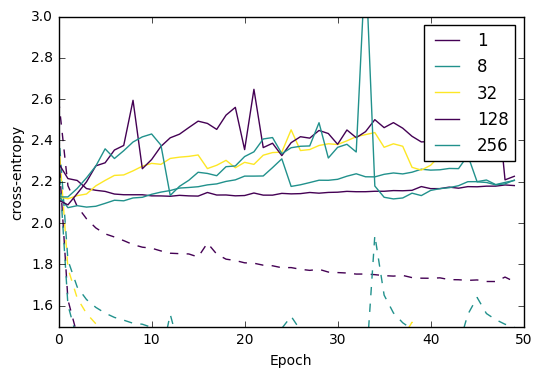

In [62]:
data = load_all_ranks('../wp_grid/cp-gate-combined-linear/')
plot_dict(data)

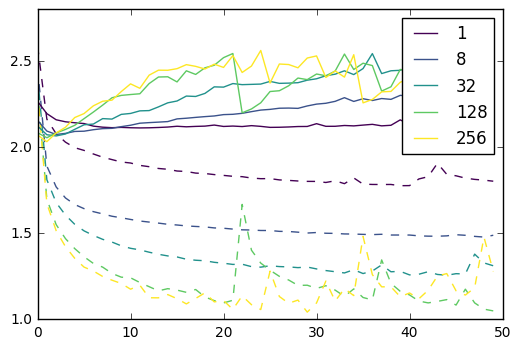

In [5]:
data = load_all_ranks('../wp_grid/cp-gate-combined-relu/')
plot_dict(data)

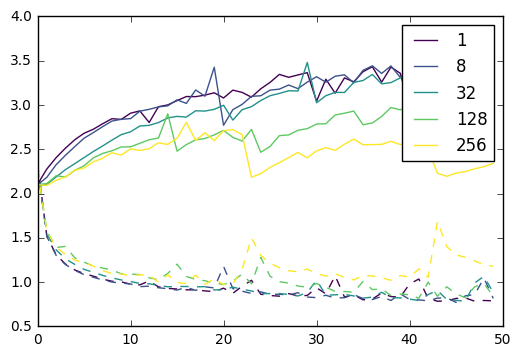

In [6]:
data = load_all_ranks('../wp_grid/cp-gate-relu/')
plot_dict(data)

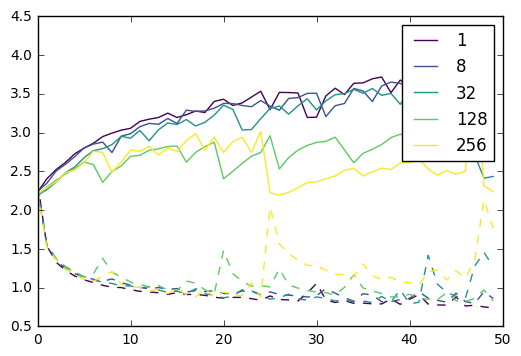

In [7]:
data = load_all_ranks('../wp_grid/cp-gate-linear/')
plot_dict(data)

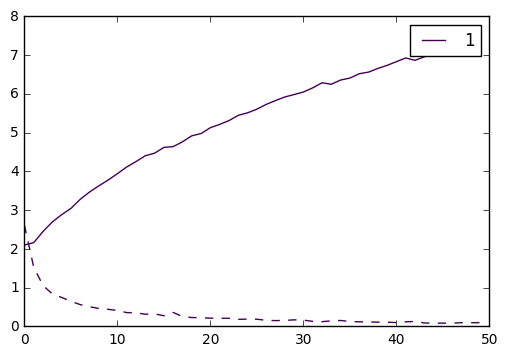

In [8]:
data = load_all_ranks('../wp_grid/gru-linear/')
plot_dict(data)

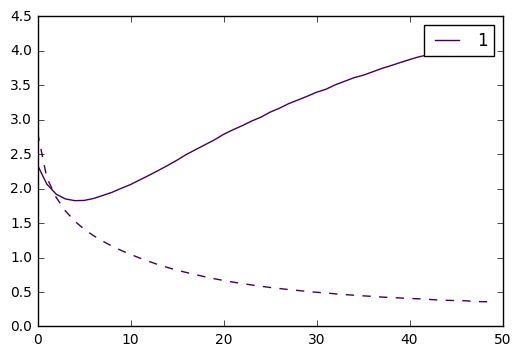

In [9]:
data = load_all_ranks('../wp_grid/lstm-linear/')
plot_dict(data)

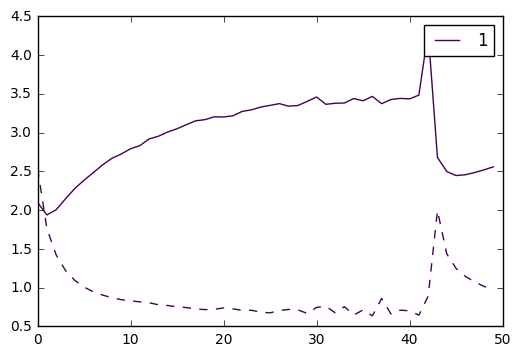

In [10]:
data = load_all_ranks('../wp_grid/tf-vanilla-linear/')
plot_dict(data)

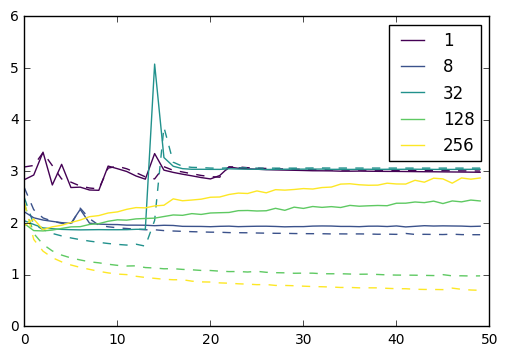

In [11]:
data = load_all_ranks('../wp_grid/simple_cp-combined-tanh/')
plot_dict(data)

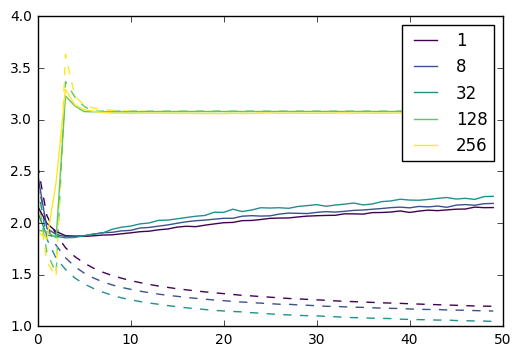

In [12]:
data = load_all_ranks('../wp_grid/simple_cp-tanh/')
plot_dict(data)

# try the ones with dropout

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~|xent |params
104691 trainable parameters.
*****************************double|1.9356|104691
105810 trainable parameters.
*******************************full|1.9573|105810
105098 trainable parameters.
*******************************half|1.9539|105098
105459 trainable parameters.
********************************one|1.9951|105459
105072 trainable parameters.
****************************quarter|1.9710|105072


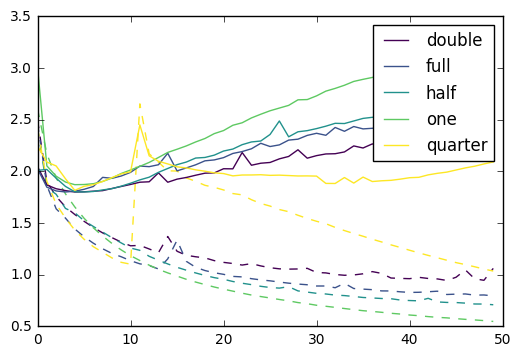

In [30]:
data = load_all_ranks('../wp_grid_dropout06_64embed/simple_cp-tanh/')
plot_dict(data, int_labels=False)

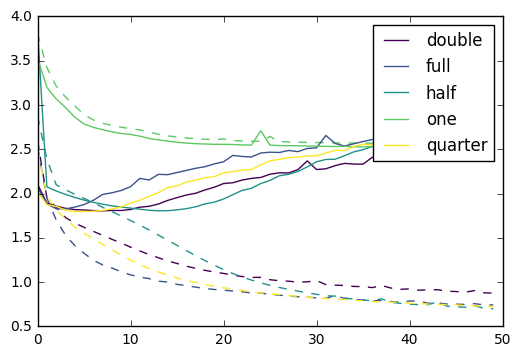

In [23]:
data = load_all_ranks('../wp_grid_dropout06_64embed/simple_cp-combined-tanh/')
plot_dict(data, int_labels=False)

In [55]:
def get_name(cell):
    if 'cp' in cell:
        if 'gate' in cell:
            name = 'TGU'
        else:
            name = 'GMR'
        if 'combined' in cell:
            name += '-C'
        if 'linear' in cell:
            name = 'lin-'+name
    else:
        base = os.path.basename(cell)
        base = base.split('-')
        if len(base) == 3:
            name = 'Vanilla'
        else:
            name = base[0].upper()
        
    return name
    

def whole_grid(path):
    cells = [os.path.join(path, cell) for cell in os.listdir(path)]
    print('got {} cells'.format(len(cells)))
    cumulative = {}
    for cell in cells:
        data = load_all_ranks(cell)
        if 'cp' in cell:
            subs = np.linspace(0.0, 1.0, len(data))
            colors = [cmap.viridis(x) for x in subs]
            plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
            plot_dict(data, int_labels=False)
            plt.title('Train/Valid loss by rank, {}'.format(get_name(cell)))
            plt.show()
        else:
            cumulative[get_name(cell)] = [data[key] for key in data][0]
    subs = np.linspace(0.0, 1.0, len(cumulative))
    colors = [cmap.viridis(x) for x in subs]
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
    plot_dict(cumulative, int_labels=False)
    plt.title('Train/Valid Loss by architecture')

got 9 cells
../wp_grid_dropout05_32embed_50kparams_reset25_l2/cp-gate-combined-linear| xent |params
********************************************double|2.0686|52607
**********************************************full|2.0481|52739
**********************************************half|2.0665|52655
***********************************************one|2.2191|52687
*******************************************quarter|2.0439|52271


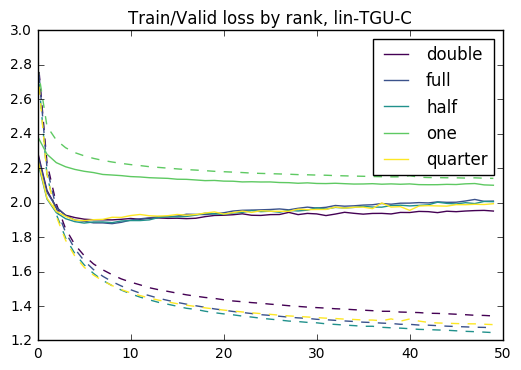

../wp_grid_dropout05_32embed_50kparams_reset25_l2/cp-gate-combined-relu| xent |params
********************************************double|2.0282|52607
**********************************************full|2.0012|52739
**********************************************half|2.0236|52655
***********************************************one|2.1871|52687
*******************************************quarter|2.0271|52271


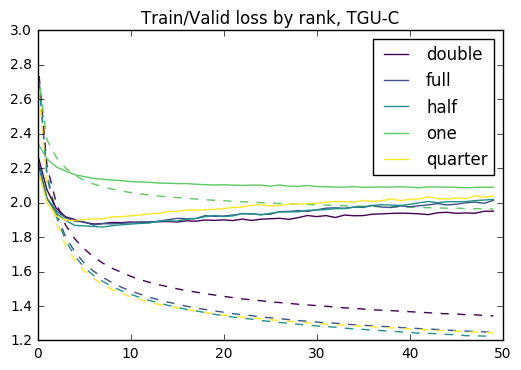

../wp_grid_dropout05_32embed_50kparams_reset25_l2/cp-gate-linear| xent |params
********************************************double|2.1022|52797
**********************************************full|2.1323|52413
**********************************************half|2.1063|52637
***********************************************one|2.1720|52531
*******************************************quarter|2.1127|52325


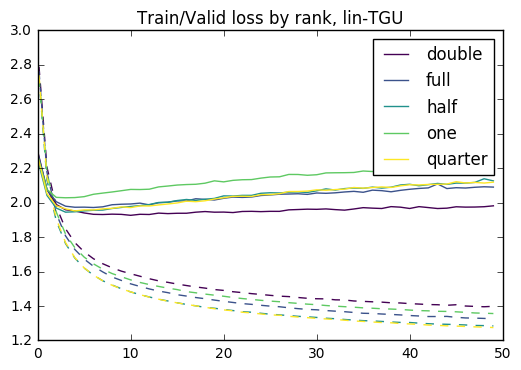

../wp_grid_dropout05_32embed_50kparams_reset25_l2/cp-gate-relu| xent |params
********************************************double|2.0739|52797
**********************************************full|2.0860|52413
**********************************************half|2.0802|52637
***********************************************one|2.0996|52531
*******************************************quarter|2.0758|52325


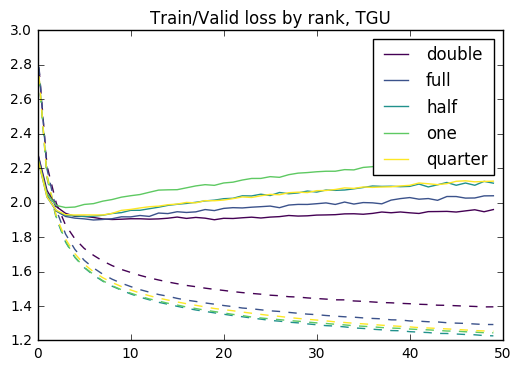

../wp_grid_dropout05_32embed_50kparams_reset25_l2/gru-linear| xent |params
***********************************************one|2.1906|53312
../wp_grid_dropout05_32embed_50kparams_reset25_l2/lstm-linear| xent |params
***********************************************one|2.1082|52635
../wp_grid_dropout05_32embed_50kparams_reset25_l2/simple_cp-combined-tanh| xent |params
********************************************double|2.0207|52277
**********************************************full|2.0026|52388
**********************************************half|2.0115|52484
***********************************************one|2.6382|52668
*******************************************quarter|2.0359|52382


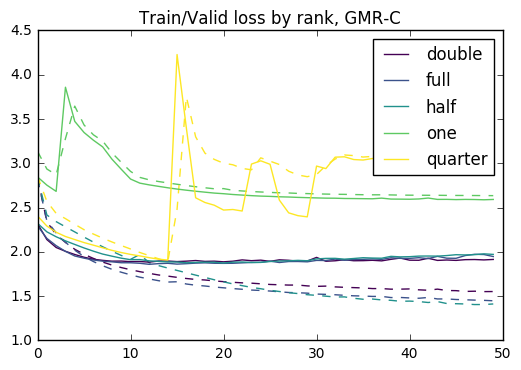

../wp_grid_dropout05_32embed_50kparams_reset25_l2/simple_cp-tanh| xent |params
********************************************double|2.0465|53139
**********************************************full|2.0485|52922
**********************************************half|2.0191|52403
***********************************************one|2.1545|52651
*******************************************quarter|2.0452|52655


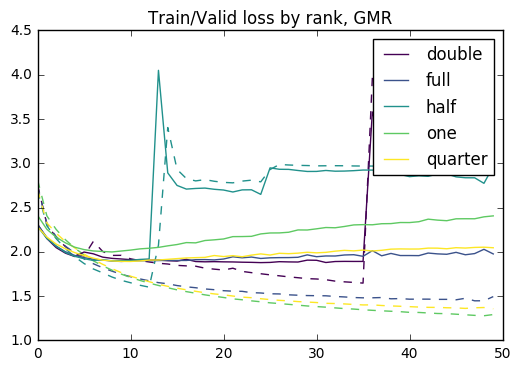

../wp_grid_dropout05_32embed_50kparams_reset25_l2/tf-vanilla-linear| xent |params
***********************************************one|2.1105|52736


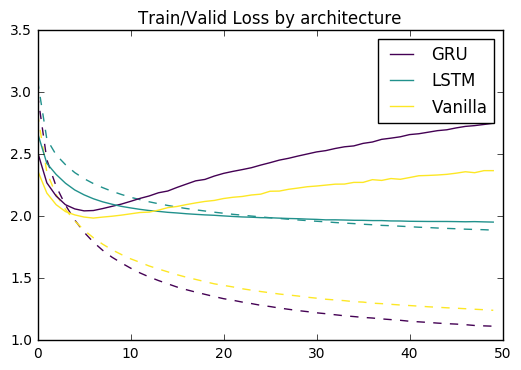

In [56]:
whole_grid('../wp_grid_dropout05_32embed_50kparams_reset25_l2/')

got 4 cells
../wp_grid_dropout05_32embed_25kparams/cp-gate-combined-linear| xent |params
********************************************double|2.0501|27519
**********************************************full|2.0278|27539
**********************************************half|2.0554|27607
***********************************************one|2.2323|27671
*******************************************quarter|2.0317|27407


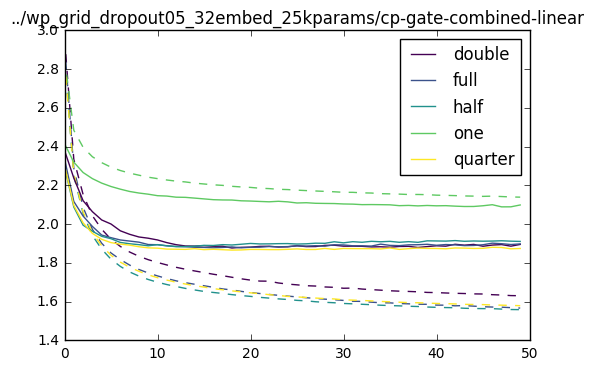

../wp_grid_dropout05_32embed_25kparams/cp-gate-combined-relu| xent |params
********************************************double|2.0419|27519
**********************************************full|2.0638|27539
**********************************************half|2.0437|27607
***********************************************one|2.1826|27671
*******************************************quarter|2.0285|27407


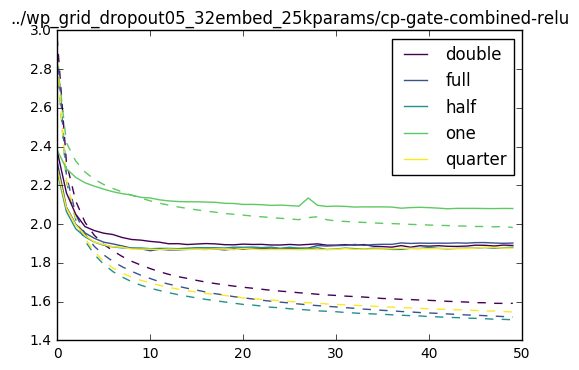

../wp_grid_dropout05_32embed_25kparams/cp-gate-linear| xent |params
********************************************double|2.0353|27335
**********************************************full|2.0721|27753
**********************************************half|2.0898|27777
***********************************************one|2.1174|27521
*******************************************quarter|2.1138|27597


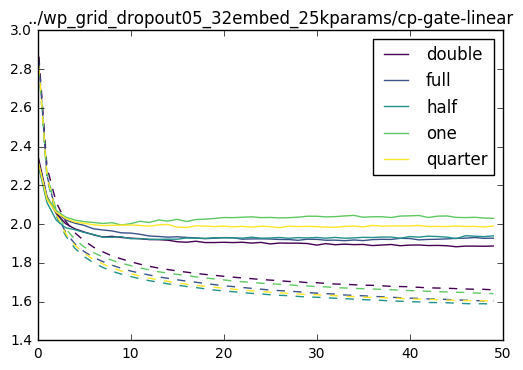

../wp_grid_dropout05_32embed_25kparams/cp-gate-relu| xent |params
********************************************double|2.0555|27335
**********************************************full|2.0549|27753
**********************************************half|2.0700|27777
***********************************************one|2.0843|27521
*******************************************quarter|2.1078|27597


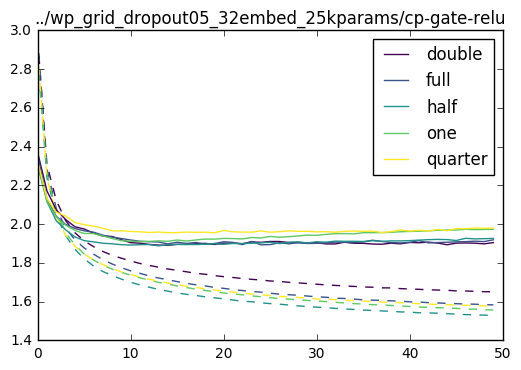

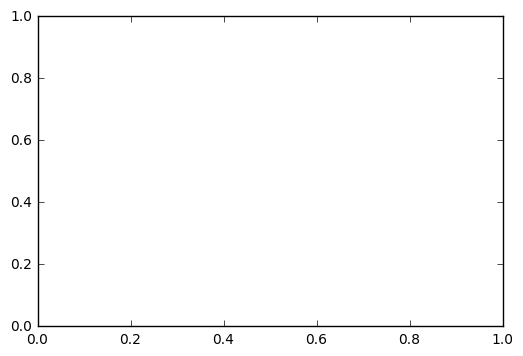

In [53]:
whole_grid('../wp_grid_dropout05_32embed_25kparams/')

got 9 cells
../wp_grid_dropout08_8embed_25kparams_reset50_l2/cp-gate-combined-linear| xent |params
********************************************double|2.0558|25563
**********************************************full|2.0777|25667
**********************************************half|2.0803|25663
***********************************************one|2.3074|25667
*******************************************quarter|2.0520|25685


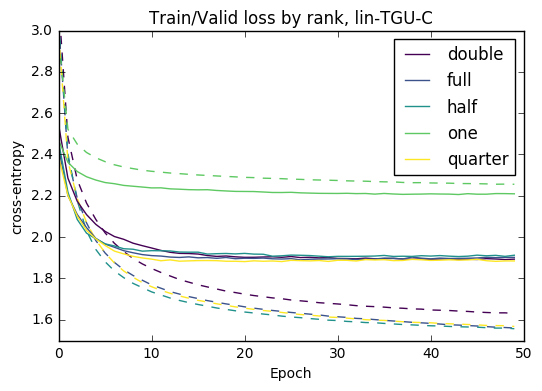

../wp_grid_dropout08_8embed_25kparams_reset50_l2/cp-gate-combined-relu| xent |params
********************************************double|2.0383|25563
**********************************************full|2.0609|25667
**********************************************half|2.0362|25663
***********************************************one|2.2121|25667
*******************************************quarter|2.0496|25685


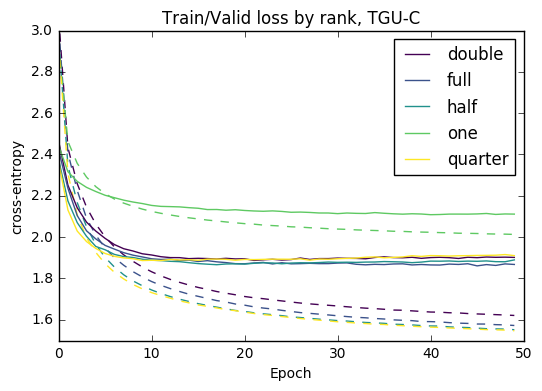

../wp_grid_dropout08_8embed_25kparams_reset50_l2/cp-gate-linear| xent |params
********************************************double|2.1287|25767
**********************************************full|2.1843|25797
**********************************************half|2.1587|25475
***********************************************one|2.2002|25825
*******************************************quarter|2.1473|25491


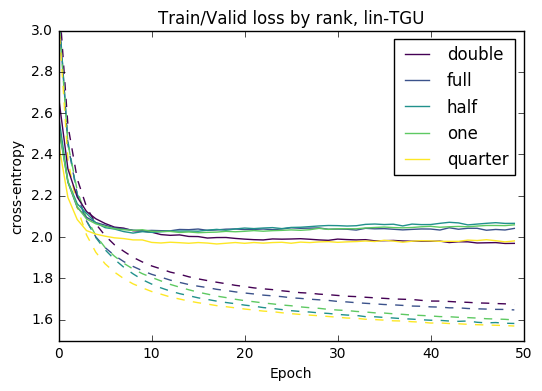

../wp_grid_dropout08_8embed_25kparams_reset50_l2/cp-gate-relu| xent |params
********************************************double|2.0872|25767
**********************************************full|2.0359|25797
**********************************************half|2.1513|25475
***********************************************one|2.1203|25825
*******************************************quarter|2.1326|25491


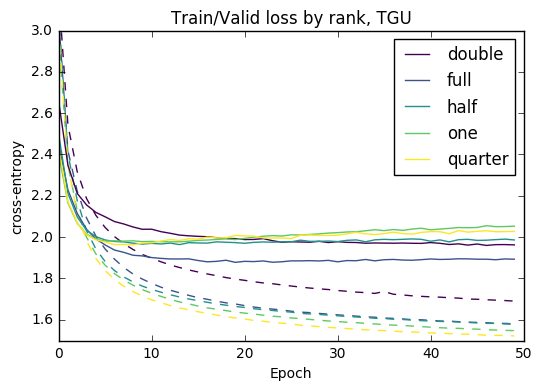

../wp_grid_dropout08_8embed_25kparams_reset50_l2/gru-linear| xent |params
***********************************************one|2.1621|25872
../wp_grid_dropout08_8embed_25kparams_reset50_l2/lstm-linear| xent |params
***********************************************one|2.1271|25382
../wp_grid_dropout08_8embed_25kparams_reset50_l2/simple_cp-combined-tanh| xent |params
********************************************double|2.0569|25604
**********************************************full|2.0316|25772
**********************************************half|2.0201|25707
***********************************************one|2.6367|25662
*******************************************quarter|2.0184|25613


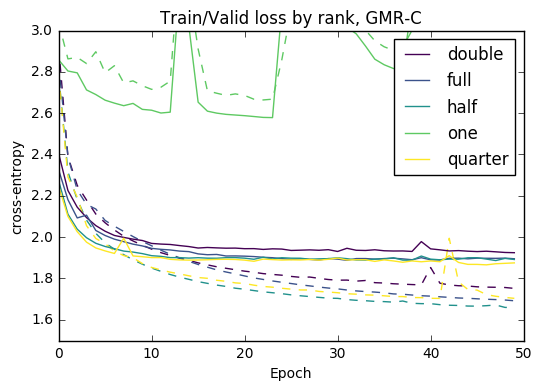

../wp_grid_dropout08_8embed_25kparams_reset50_l2/simple_cp-tanh| xent |params
********************************************double|2.0570|25940
**********************************************full|2.0231|25675
**********************************************half|2.0076|25587
***********************************************one|2.1403|25771
*******************************************quarter|2.0345|25490


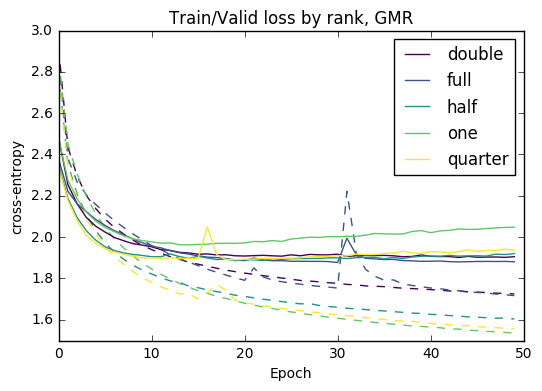

../wp_grid_dropout08_8embed_25kparams_reset50_l2/tf-vanilla-linear| xent |params
***********************************************one|2.1284|25527


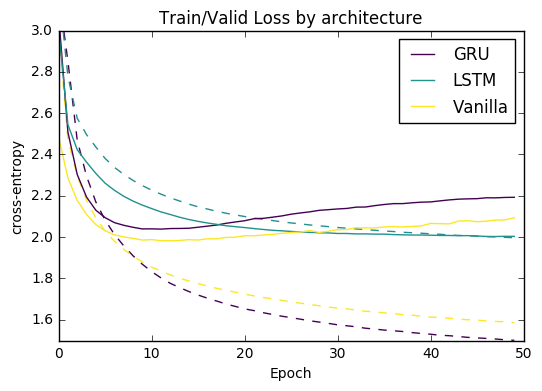

In [63]:
whole_grid('../wp_grid_dropout08_8embed_25kparams_reset50_l2/')